# Random Forest Project 

For this project we will be exploring publicly available data from lendingclub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [4]:
df = pd.read_csv('loan_data.csv')

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [33]:
df.describe(include=['object'])

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


In [35]:
abs(df.corr()['not.fully.paid']).sort_values()

delinq.2yrs          0.008881
days.with.cr.line    0.029237
log.annual.inc       0.033439
dti                  0.037362
pub.rec              0.048634
installment          0.049955
revol.bal            0.053699
revol.util           0.082088
inq.last.6mths       0.149452
fico                 0.149666
credit.policy        0.158119
int.rate             0.159552
not.fully.paid       1.000000
Name: not.fully.paid, dtype: float64

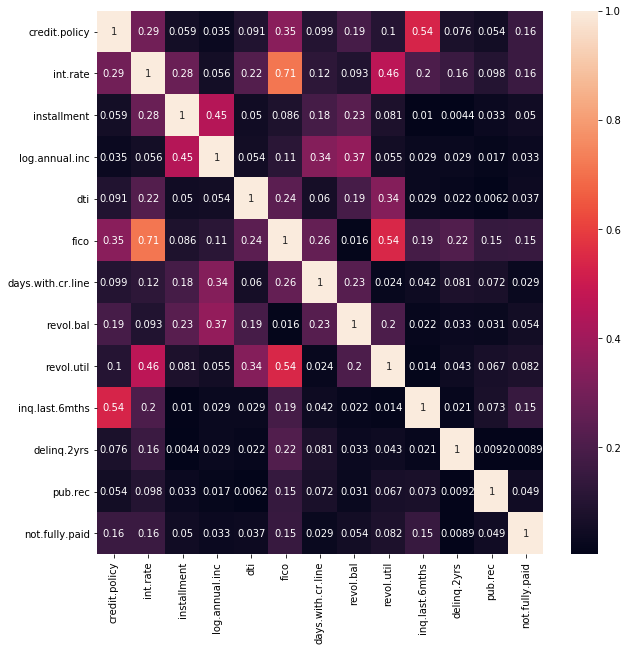

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True)

# Exploratory Data Analysis

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

Text(0.5, 0, 'fico')

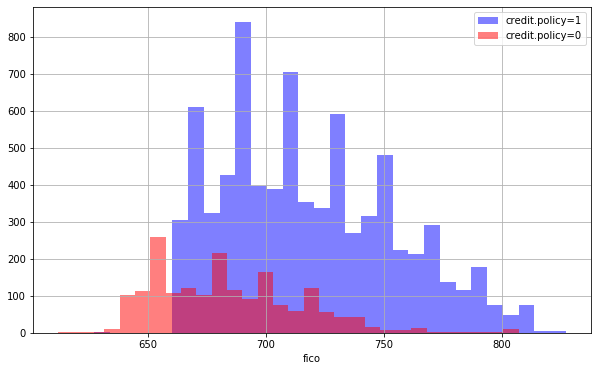

In [23]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='credit.policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='credit.policy=0')
plt.legend()
plt.xlabel('fico')

From the above figure we can say there are more people with credit policy of 1 in the dataset that credit policy of 0.

Also, people with lower fico score tend to have credit policy of 0.

Moreover, anyone with fico score of lower than 660 will automatically not meet the credit card criteria (credit policy of 0)

**Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'fico')

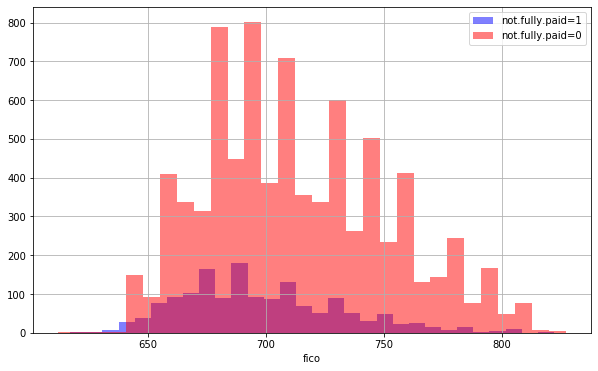

In [24]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('fico')

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

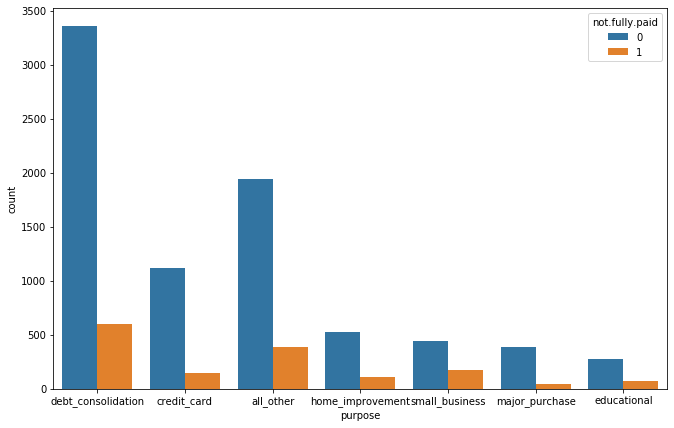

In [27]:
plt.figure(figsize=(11,7))
sns.countplot('purpose', data=df, hue='not.fully.paid')

From the above we can say the most popular reason of getting loan is debt consolidation

Also, we can see the ratio between fully paid and not fully paid is similar between all of the reasons.

**Let's see the trend between FICO score and interest rate.**

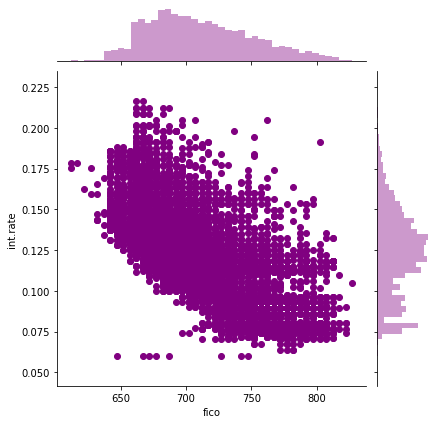

In [30]:
sns.jointplot(x='fico', y='int.rate', data=df, color='purple')

The above plot shows as your fico score increases (better credit) the interest rate decreses.

**Let's see if the trend differed between not.fully.paid and credit.policy.**

<Figure size 792x504 with 0 Axes>

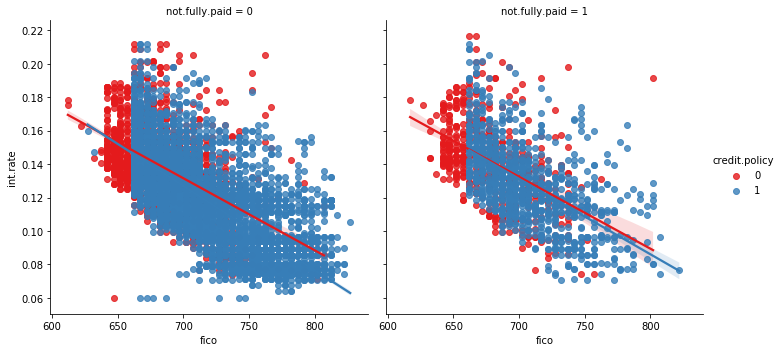

In [32]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

The above shows the behaviour is the same whether or not the load is fully paid or not or whether or not they were denyed the credit policy.

# Setting up the Data

## Categorical Features

We will be using dummy variables to transform the **purpose** column to categorical.

In [47]:
purpose = pd.get_dummies(df['purpose'], drop_first=True)

In [52]:
df = pd.concat([df, purose], axis=1)

In [54]:
df.drop('purpose', axis=1, inplace=True)

In [57]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

In [58]:
from sklearn.model_selection import train_test_split
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [60]:
y_pred = dtree.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
print('Classification Report for Decision Tree Model:\n', classification_report(y_pred, y_test))

Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      2335
           1       0.23      0.19      0.21       539

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.71      0.73      0.72      2874



In [63]:
print('Confusion Matrix for Decision Tree Model:\n', confusion_matrix(y_pred, y_test))

Confusion Matrix for Decision Tree Model:
 [[1993  342]
 [ 438  101]]


## Training the Random Forest model

In [72]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators=300)
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation of Random Forest Model

In [73]:
y_pred = ranfor.predict(X_test)

In [74]:
print('Classification Report for Decision Tree Model:\n', classification_report(y_pred, y_test))

Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      2855
           1       0.02      0.47      0.04        19

    accuracy                           0.85      2874
   macro avg       0.51      0.66      0.48      2874
weighted avg       0.99      0.85      0.91      2874



In [75]:
print('Confusion Matrix for Decision Tree Model:\n', confusion_matrix(y_pred, y_test))

Confusion Matrix for Decision Tree Model:
 [[2421  434]
 [  10    9]]


**What performed better the random forest or the decision tree?**

It depends on what metric we are trying to optimize for. But on average Random Forest performed better.